### tensorflow GPU Example

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Checking if GPU is available and set device

In [3]:
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# Download and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Add a channel dimension to the images
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [6]:
# Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

In [7]:
# Define the CNN architecture using the Keras API
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Training the model
model.fit(train_dataset, epochs=5)


Epoch 1/5


938/938 [==============================] - 13s 12ms/step - loss: 0.1551 - accuracy: 0.9534
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0473 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0308 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0235 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0186 - accuracy: 0.9938


In [9]:
# Testing the model
model.evaluate(test_dataset)

# Inference on new data
test_images, test_labels = next(iter(test_dataset)) # get first batch of test dataset

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy using sklearn
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


2/2 [==============================] - 0s 5ms/step
Test Accuracy: 98.44%


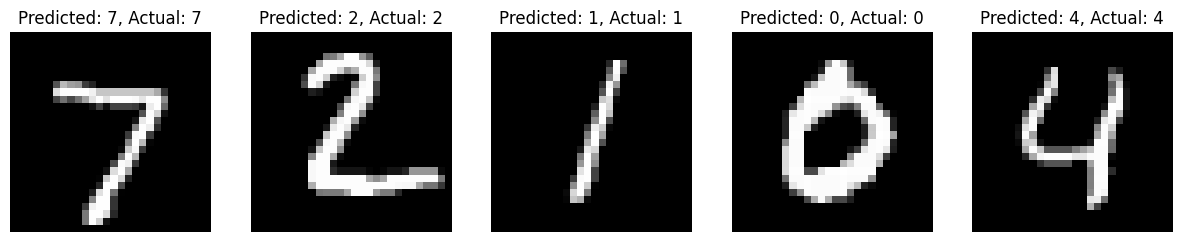

In [10]:
# Display some sample predictions
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(test_images[i, :, :, 0], cmap='gray')
    axs[i].set_title(f'Predicted: {predicted_labels[i]}, Actual: {test_labels[i]}')
    axs[i].axis('off')

plt.show()